In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
main_data = np.loadtxt("Data.dat")

time = main_data[:, 0] # [JD]
observed = main_data[:, 1] #[differential magnitude]
calculated=main_data[:,2] # [differential magntiude]
reesiduals=main_data[:,3] # [differential magntiude]
point_weight=main_data[:,4] 
point_error=main_data[:,5]

# Cargar periodos
periodos = np.loadtxt("freqs.per")
# Obtener frecuencias y parámetros de los periodos
freq = periodos[1, 0]/86400  # Frecuencia principal en [Hz]
amp = periodos[1, 1]   # Amplitud
phase = periodos[1, 2] # Fase
     #Armonicos
freqh1 = periodos[0, 0]/86400  # [Hz] 
amph1 = periodos[0, 1]   
phaseh1 = periodos[0, 2]

freqh2 = periodos[2, 0]/86400   # [Hz]
amph2 = periodos[2, 1]   
phaseh2 = periodos[2, 2]

freqh3 = periodos[3, 0]/86400   # [Hz]
amph3 = periodos[3, 1]   
phaseh3 = periodos[3, 2]

freqh4 = periodos[4, 0]/86400   # [Hz]
amph4 = periodos[4, 1]   
phaseh4 = periodos[4, 2]

freqh5 = periodos[5, 0]/86400 # [Hz]  
amph5 = periodos[5, 1]   
phaseh5 = periodos[5, 2]

#Transformada de fourier
tf=np.loadtxt("TF_2.fou")
tf_freqs=tf[:,0]/86400 # [Hz]
tf_amps=tf[:,1]

###           TF de armonicos
tfh_1=np.loadtxt("TF_1.fou")
tfh_freq_1=tfh_1[:,0]/86400 # [Hz]
tfh_amp_1=tfh_1[:,1]

tfh_2=np.loadtxt("TF_3.fou")
tfh_freq_2=tfh_2[:,0]/86400 # [Hz]
tfh_amp_2=tfh_2[:,1]

tfh_3=np.loadtxt("TF_res_1.fou")
tfh_freq_3=tfh_3[:,0]/86400 # [Hz]
tfh_amp_3=tfh_3[:,1]

tfh_4=np.loadtxt("TF_res_2.fou")
tfh_freq_4=tfh_4[:,0]/86400 # [Hz]
tfh_amp_4=tfh_4[:,1]

tfh_5=np.loadtxt("TF_res_3.fou")
tfh_freq_5=tfh_5[:,0]/86400 # [Hz]
tfh_amp_5=tfh_5[:,1]

#Spectral window

tf_spectral_window=np.loadtxt("Spectral_window.fou")
tf_spectral_window_freq=tf_spectral_window[:,0]/86400 # [Hz]
tf_spectral_window_amp=tf_spectral_window[:,1]

#Frequencies folded with spectral window
tf_folded_w_sw=np.loadtxt("f2_ffwsw.fou") 
tf_fwsw_freq=tf_folded_w_sw[:,0]/86400 # [Hz]
tf_fwsw_amp=tf_folded_w_sw[:,1]
    # harmonics freqs

tfh_folded_w_sw_1=np.loadtxt("f1_ffwsw.fou") 
tfh_fwsw_freq_1=tfh_folded_w_sw_1[:,0]/86400 # [Hz]
tfh_fwsw_amp_1=tfh_folded_w_sw_1[:,1]

tfh_folded_w_sw_2=np.loadtxt("f3_ffwsw.fou") 
tfh_fwsw_freq_2=tfh_folded_w_sw_2[:,0]/86400 # [Hz]
tfh_fwsw_amp_2=tfh_folded_w_sw_2[:,1]

tfh_folded_w_sw_3=np.loadtxt("f4_ffwsw.fou") 
tfh_fwsw_freq_3=tfh_folded_w_sw_3[:,0]/86400 # [Hz]
tfh_fwsw_amp_3=tfh_folded_w_sw_3[:,1]

tfh_folded_w_sw_4=np.loadtxt("f5_ffwsw.fou") 
tfh_fwsw_freq_4=tfh_folded_w_sw_4[:,0]/86400 # [Hz]
tfh_fwsw_amp_4=tfh_folded_w_sw_4[:,1]

tfh_folded_w_sw_5=np.loadtxt("f6_ffwsw.fou") 
tfh_fwsw_freq_5=tfh_folded_w_sw_5[:,0]/86400 # [Hz]
tfh_fwsw_amp_5=tfh_folded_w_sw_5[:,1]

#Spectrums noises
noise_spectrum=np.loadtxt("Spectrum_noise_original_data.dat")
ns_freqs=noise_spectrum[:,0]/86400 # [Hz]
ns_noise_amp=noise_spectrum[:,1]
  #residuals spectrum noise
noise_spectrum_residuals=np.loadtxt("Spectrum_noise_residuals.dat")
ns_freqs_res=noise_spectrum[:,0]/86400 # [Hz]
ns_res_noise_amp=noise_spectrum[:,1]

#Noise at frequencies
freq_noices=np.loadtxt("Noise_frequencies.dat")

f=freq# [Hz]
f_noise_amp=freq_noices[1,1]
f_snr=freq_noices[1,2]
### noise freq at harmonics
fh1=freqh1
fh1_noise_amp=freq_noices[0,1]
fh1_snr=freq_noices[0,2]

fh2=freqh2
fh2_noise_amp=freq_noices[2,1]
fh2_snr=freq_noices[2,2]

fh3=freqh3
fh3_noise_amp=freq_noices[3,1]
fh3_snr=freq_noices[3,2]

fh4=freqh4
fh4_noise_amp=freq_noices[4,1]
fh4_snr=freq_noices[4,2]

fh5=freqh5
fh5_noise_amp=freq_noices[5,1]
fh5_snr=freq_noices[5,2]


In [2]:
# Cambiar la fuente global
mpl.rcParams['font.family'] = 'serif'         # o 'sans-serif'
mpl.rcParams['font.serif']  = ['Times New Roman']   # ejemplo

C:\Users\USER\AppData\Local\Temp\ipykernel_7156\2408795545.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(time, observed, yerr=point_error, fmt='.', markersize=10,marker="*",


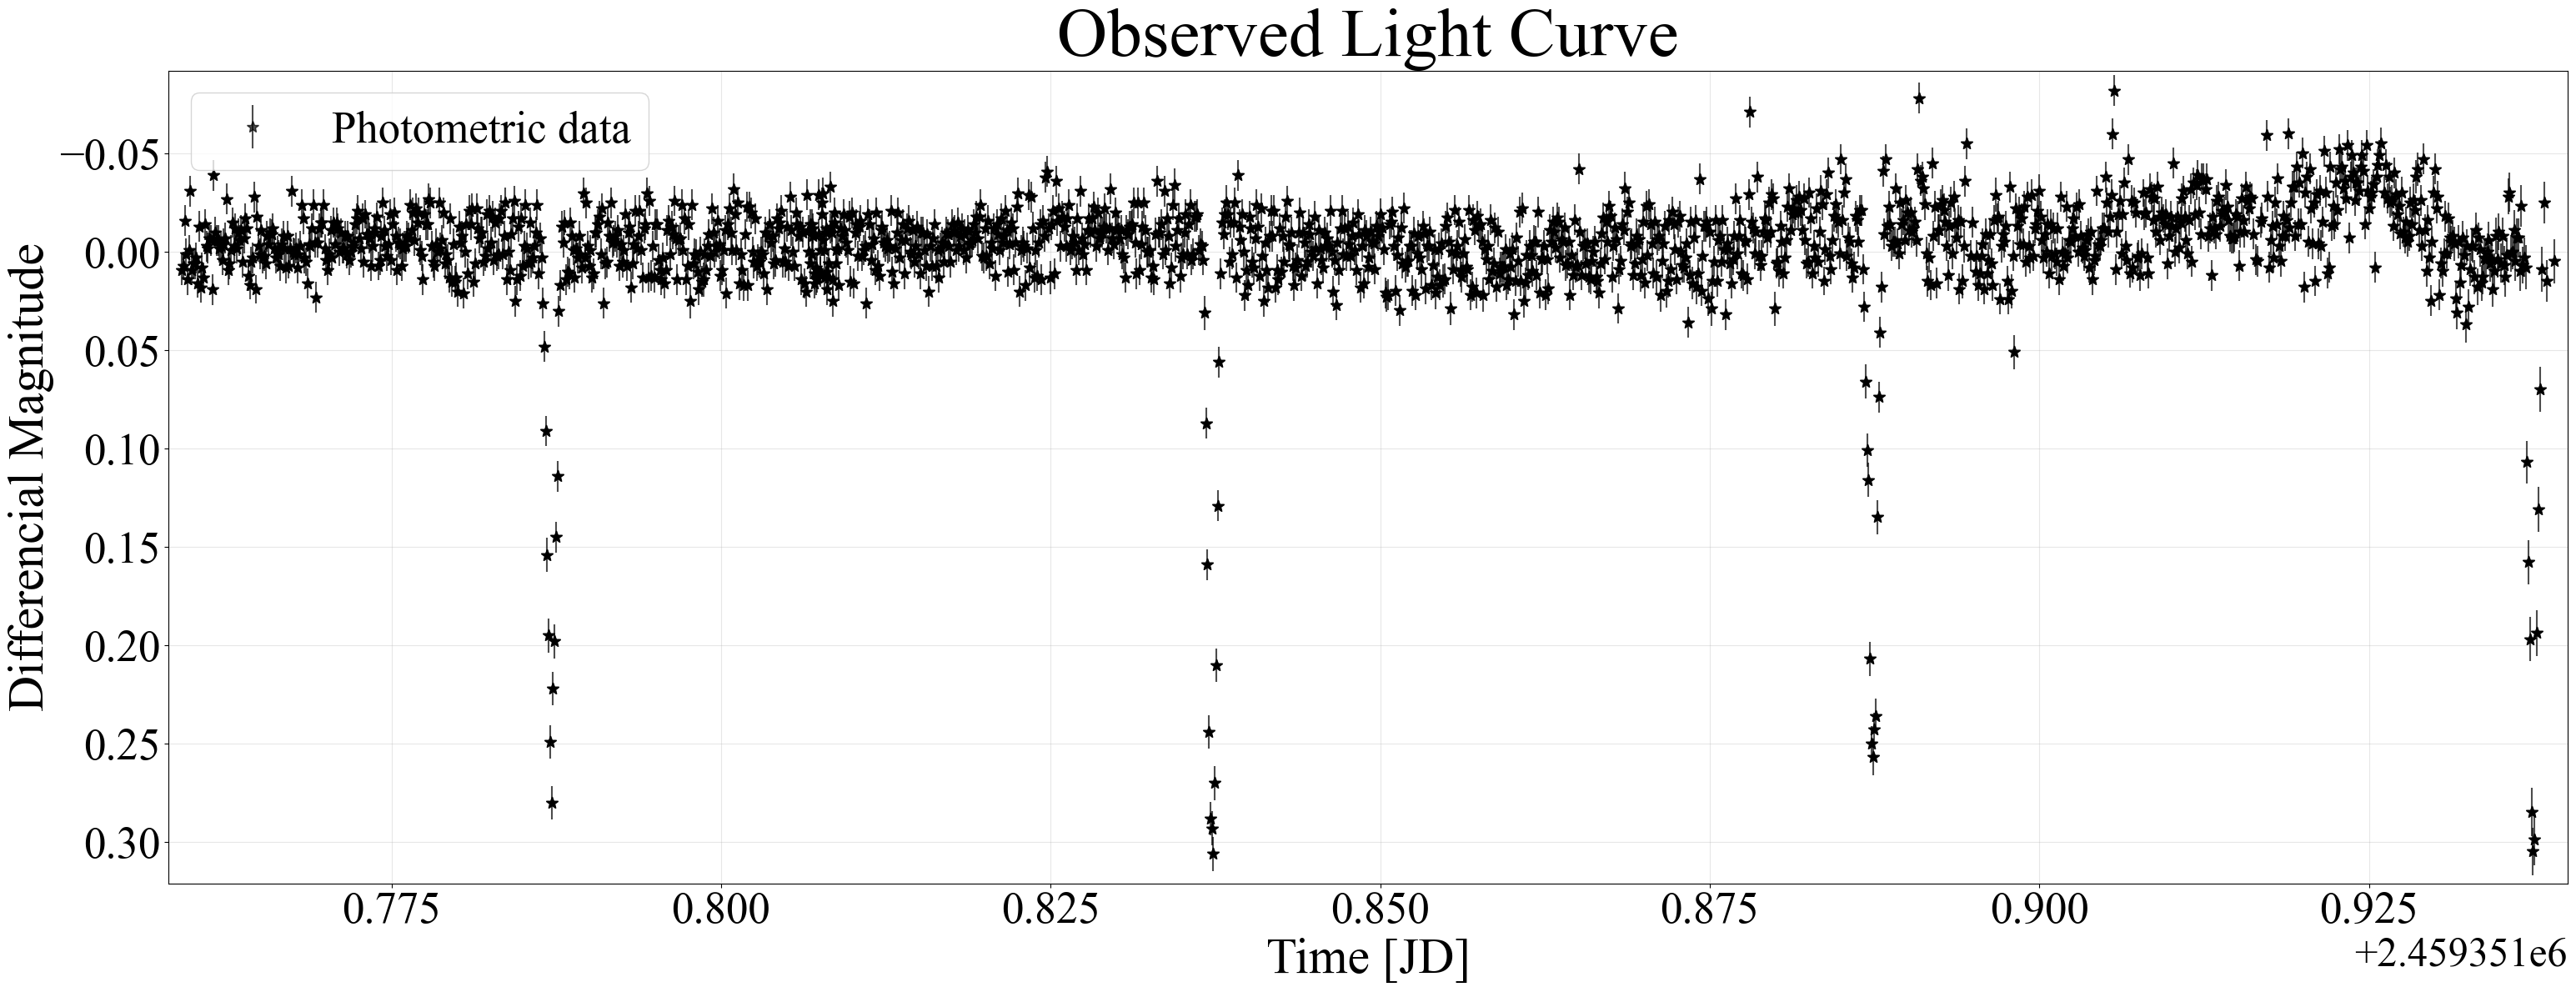

In [5]:
plt.figure(figsize=(31,12))
plt.scatter(time,observed,color="black",marker="*",s=105)
plt.errorbar(time, observed, yerr=point_error, fmt='.', markersize=10,marker="*", 
                alpha=0.7, label='Photometric data',color="black")
plt.xlim(np.min(time)-0.001,np.max(time)+0.001)
plt.ylim(np.min(observed)-0.01,np.max(observed)+0.015)
plt.xlabel('Time [JD]',fontsize=43)
plt.ylabel('Differencial Magnitude',fontsize=43)
plt.title('Observed Light Curve',fontsize=60)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=40)
plt.xticks(fontsize=38)  # tamaño de los números en el eje x
plt.yticks(fontsize=38)
plt.legend(fontsize=38)
# AUMENTAR EL TEXTO DEL OFFSET (notación científica del eje X)
plt.gca().xaxis.get_offset_text().set_fontsize(35)
plt.tight_layout()
plt.gca().invert_yaxis() 